In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df = pd.read_csv("weuro_2025.csv")

df['BP'] = df['BP'].str.replace('%', '').astype(float)
df['Passes'] = df['Passes'].str.replace('%', '').astype(float)

df['xG_per_Shot'] = df['xG'] / df['TS']
df['SOT_per_TS'] = df['SOT'] / df['TS']
df['xG_to_Goal'] = df['Score'] / df['xG']

sns.set(style="whitegrid", font="Arial")

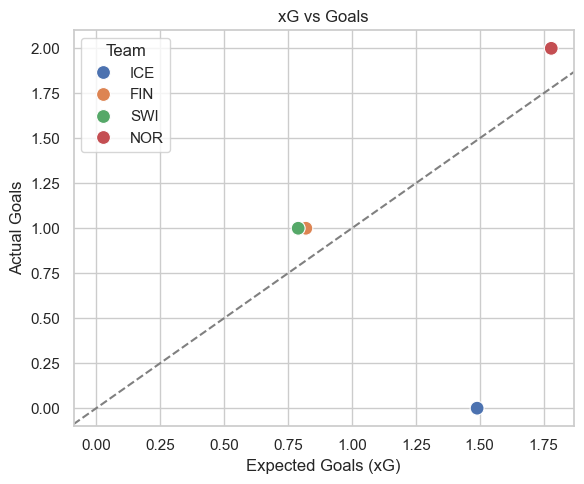

In [13]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='xG', y='Score', hue='Team', s=100)
plt.axline((0, 0), slope=1, linestyle='--', color='gray')
plt.title('xG vs Goals')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.tight_layout()
plt.savefig('xG_vs_Goals.png')
plt.show()

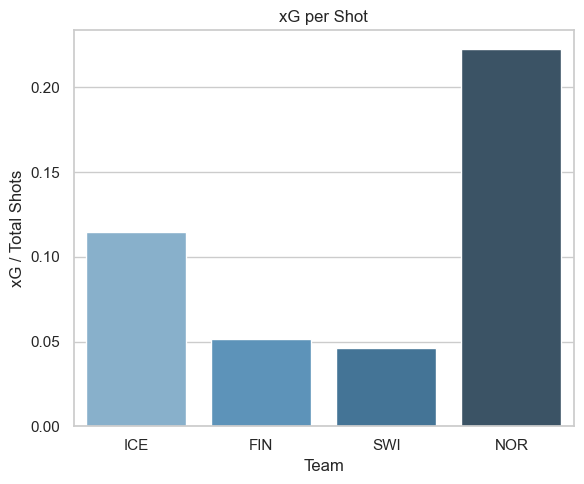

In [15]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Team', y='xG_per_Shot', hue='Team', palette='Blues_d', legend=False)
plt.title('xG per Shot')
plt.ylabel('xG / Total Shots')
plt.tight_layout()
plt.savefig('xG_per_Shot_2.png')
plt.show()

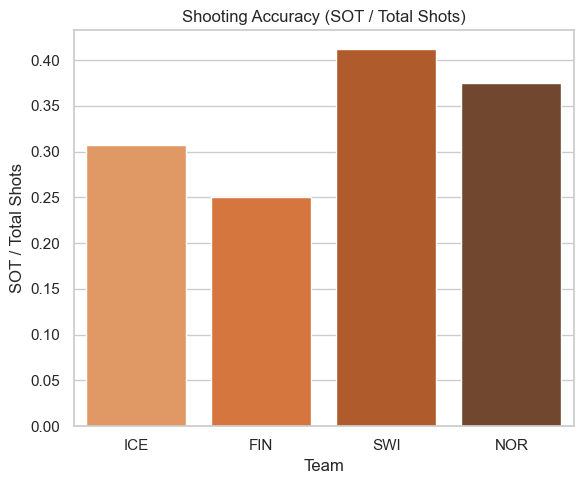

In [17]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Team', y='SOT_per_TS', hue='Team', palette='Oranges_d', legend=False)
plt.title('Shooting Accuracy (SOT / Total Shots)')
plt.ylabel('SOT / Total Shots')
plt.tight_layout()
plt.savefig('Shooting_Accuracy_3.png')
plt.show()

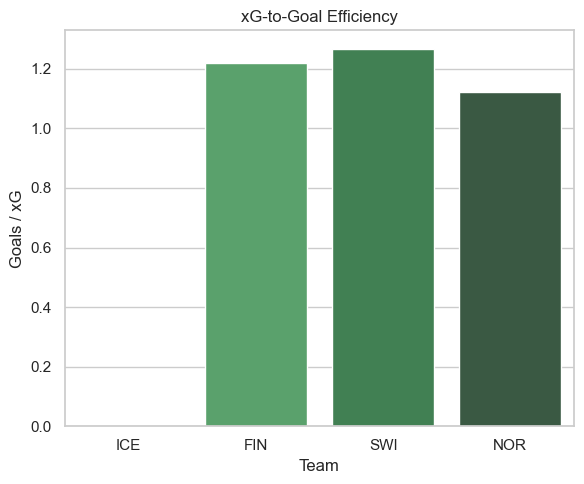

In [23]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Team', y='xG_to_Goal', hue='Team', palette='Greens_d', legend=False)
plt.title('xG-to-Goal Efficiency')
plt.ylabel('Goals / xG')
plt.tight_layout()
plt.savefig('Efficiency_4.png')
plt.show()

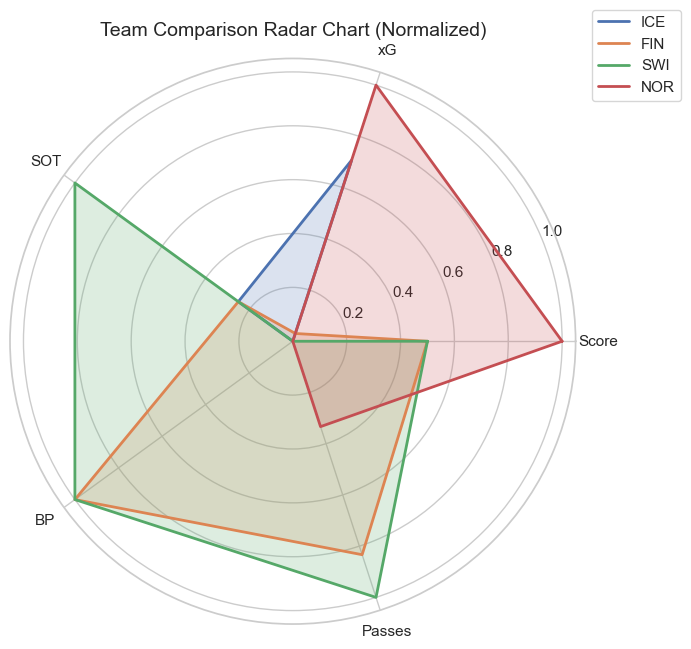

In [21]:
radar_cols = ['Score', 'xG', 'SOT', 'BP', 'Passes']

norm_df = df.copy()
scaler = MinMaxScaler()
norm_df[radar_cols] = scaler.fit_transform(df[radar_cols])

def plot_radar_multi(df, teams):
    categories = radar_cols
    values_list = []
    
    for team in teams:
        values = df[df['Team'] == team][categories].values.flatten().tolist()
        values += values[:1]
        values_list.append(values)

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    for i, values in enumerate(values_list):
        ax.plot(angles, values, linewidth=2, label=teams[i])
        ax.fill(angles, values, alpha=0.2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title('Team Comparison Radar Chart (Normalized)', size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()
    plt.savefig('Radar_Chart5.png')
    plt.show()

plot_radar_multi(norm_df, df['Team'].unique())